In [2]:
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from scipy.stats import norm
import seaborn as sns
from sklearn.gaussian_process.kernels import ExpSineSquared
from sklearn.gaussian_process.kernels import RationalQuadratic
from sklearn.gaussian_process.kernels import WhiteKernel
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv(r'sp500_appended_data_month_637.csv')

In [ ]:
df.columns

In [ ]:
for i in df.columns:
    plt.plot(df[i])
    plt.xlabel('Index')
    plt.ylabel(f'{i}')
    plt.show()

In [ ]:
df.describe()

In [ ]:
df['permno'].value_counts

In [3]:
import os
import pandas as pd

folder_path = r"C:\Users\91636\Desktop\BTP\sp500_data"

data_frames = []

for file in sorted(os.listdir(folder_path)):  
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        
        df = pd.read_csv(file_path, usecols=lambda col: col not in ['Unnamed: 0', 'X'])
        data_frames.append(df)

merged_df = pd.concat(data_frames, ignore_index=True)
merged_df.to_csv("merged_sp500_data.csv", index=False)


def get_stock_data(permno):
    return merged_df[merged_df['permno'] == permno].sort_values(by='DATE')




In [ ]:
stock_data = get_stock_data(10104)
stock_data

In [ ]:
plt.figure(figsize=(12,10))
plt.plot(stock_data['DATE'],stock_data['price'])

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
monthly_df = merged_df

features_df = monthly_df.drop(columns=['permno', 'DATE'])  # Keep only numeric features

# Standardize data (important for PCA & Lasso)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

imputer = SimpleImputer(strategy='median')  # Impute missing values with median
X_imputed = imputer.fit_transform(features_df)

X_scaled = scaler.fit_transform(X_imputed)

# Step 1: PCA - Identify Redundant Features
pca = PCA(n_components=0.95)  # Keep 95% variance

print(X_scaled)
X_pca = pca.fit_transform(X_scaled)

# Step 2: LASSO - Identify Important Features
lasso = LassoCV(cv=5).fit(X_scaled, features_df['return'])  # Assuming 'return' as target
lasso_selected = np.array(features_df.columns)[lasso.coef_ != 0]  # Features with non-zero coefficients

# Step 3: Find Dependent Features Across Stocks
correlated_features = {}
for permno in monthly_df['permno'].unique():
    stock_data = monthly_df[monthly_df['permno'] == permno].drop(columns=['permno', 'DATE'])
    corr_matrix = stock_data.corr().abs()  # Absolute correlation
    for f1, f2 in combinations(stock_data.columns, 2):
        if corr_matrix.loc[f1, f2] > 0.8:  # Threshold for strong dependency
            correlated_features[(f1, f2)] = correlated_features.get((f1, f2), 0) + 1

# Step 4: Plot Feature Dependency Frequency
feature_pairs, counts = zip(*sorted(correlated_features.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(12, 6))
sns.barplot(x=[f"{f1}-{f2}" for f1, f2 in feature_pairs[:20]], y=counts[:20])  # Top 20 dependencies
plt.xticks(rotation=90)
plt.xlabel("Feature Pairs")
plt.ylabel("Number of Stocks with Dependency")
plt.title("Top Dependent Feature Pairs Across Stocks")
plt.show()

In [ ]:
# Ensure correlated_features is not empty
if correlated_features:
    # Extract feature pairs and their frequencies
    feature_pairs, counts = zip(*sorted(correlated_features.items(), key=lambda x: x[1], reverse=True))

    # Convert to lists for plotting
    feature_pairs = list(feature_pairs)
    counts = list(counts)

    # Plot Feature Dependency Frequency
    plt.figure(figsize=(12, 6))
    sns.barplot(x=[f"{f1}-{f2}" for f1, f2 in feature_pairs[:10]], y=counts[:10])  # Top 20 dependencies
    plt.xticks(rotation=90)
    plt.xlabel("Feature Pairs")
    plt.ylabel("Number of Stocks with Dependency")
    plt.title("Top Dependent Feature Pairs Across Stocks")
    plt.show()
else:
    print("No highly correlated features found.")


In [4]:
dfx = pd.read_csv(r"merged_sp500_data.csv")
dfx_s1 = dfx[dfx['permno'] == 28388]
dfx_s2 = dfx[dfx['permno'] == 85058]


In [ ]:
dfx_s1

In [21]:
stock_1 = (dfx_s1['beta'])
stock_2 = (dfx_s2['beta'])

stocks_2D = np.transpose(np.vstack((stock_1,stock_2)))
print(stocks_2D)

[[1.24707383 1.19810373]
 [1.2559613  1.20279282]
 [1.2506694  1.198545  ]
 [1.24506083 1.19829682]
 [1.24873384 1.20024485]
 [1.24804425 1.19942528]
 [1.2294382  1.16589119]
 [1.22869352 1.16335715]
 [1.24004452 1.1819914 ]
 [1.23964452 1.17794924]
 [1.23623607 1.16465927]
 [1.22492555 1.16145695]
 [1.22675514 1.15260069]
 [1.22756769 1.15168464]
 [1.21679232 1.14019617]
 [1.21472779 1.14978852]
 [1.20990562 1.14287085]
 [1.20605604 1.1428237 ]
 [1.2026662  1.14127171]
 [1.20915067 1.14379618]
 [1.21030374 1.14788117]
 [1.21487994 1.15291817]
 [1.42080434 1.31823715]
 [1.33404228 1.24513804]
 [1.36125094 1.26792729]
 [1.41233878 1.26264317]
 [1.37466202 1.25699933]
 [1.39603424 1.30582546]
 [1.34452179 1.23733305]
 [1.33154777 1.2076177 ]
 [1.3160978  1.19780307]
 [1.27787675 1.16355007]
 [1.23971051 1.12179168]
 [1.16738473 1.05723084]
 [1.19940316 1.06159435]
 [1.18896983 1.06439777]
 [1.17082737 1.04025353]
 [1.18702436 1.04597139]
 [1.18748868 1.03647575]
 [1.17794298 1.03099626]


In [ ]:
res = dfx['beta']
res

In [ ]:
dfx

In [ ]:
count = 0
df_feature = pd.DataFrame()
for val in dfx['permno'].unique():
    # print(val)
    count+=1
    df_feature[val] = dfx[dfx['permno'] == val]['beta']
# print(count)
df_feature

In [110]:
df_beta = dfx.pivot(index="DATE", columns="permno", values="beta")


In [ ]:
df_beta

In [ ]:
df_beta = df_beta.dropna(axis = 1)
df_beta

In [113]:
res = df_beta

In [114]:
res.to_csv(r"C:\Users\91636\Desktop\BTP\ip_R_sem2.csv")


In [ ]:
import scipy.stats as st
df = pd.read_csv(r"C:\Users\91636\Desktop\BTP\ip_R_sem2.csv")
high_corr_stocks_pairs = pd.DataFrame(np.arange(3).reshape(1, 3), index=[0], columns = ['stock1', 'stock2','kendalltau'])
print(df)
columns = df.columns
stocks_list = columns[1::]
print(stocks_list)
df1 = df.loc[:, stocks_list]

pair_num = 0

for i in range(len(stocks_list)):
    for j in range(i+1,len(stocks_list)):
        u1 = st.rankdata(df[stocks_list[i]])
        u2 = st.rankdata(df[stocks_list[j]])
        tau,p_val = st.kendalltau(u1,u2)
        # print(tau)
        if(tau>=0.5):
            high_corr_stocks_pairs.loc[pair_num,'stock1'] = stocks_list[i]
            high_corr_stocks_pairs.loc[pair_num,'stock2'] = stocks_list[j]
            high_corr_stocks_pairs.loc[pair_num,'kendalltau'] = tau
            pair_num = pair_num+1

high_corr_stocks_pairs.sort_values(by = ['kendalltau'],inplace = True)
print(high_corr_stocks_pairs)
print(len(high_corr_stocks_pairs))

high_corr_stocks_pairs.to_csv(r"C:\Users\91636\Desktop\BTP\test_sem2.csv", index=False)

In [ ]:

df = pd.read_csv(r"C:\Users\91636\Desktop\BTP\ip_R_sem2.csv")
print(df)
print(df.columns[0])
df.drop(columns = df.columns[0],axis = 1,inplace = True)
df = np.log(df[:]/df[:].shift(1))
train_df = df.loc[1:int(len(df) * 2 / 3), :]
test_df = df.loc[int(len(df) * 2 / 3) + 1:, :]

trading_date_num = len(test_df)

In [ ]:
train_df

In [ ]:
high_corr_stocks_pairs = pd.read_csv(r"C:\Users\91636\Desktop\BTP\test_sem2.csv")
high_corr_stocks_pairs =high_corr_stocks_pairs[:-1]
print(high_corr_stocks_pairs)

pair_num = len(high_corr_stocks_pairs)

columns = df.columns
stocks_list = columns[1::]
print(df)
signal_df = pd.DataFrame(np.arange(trading_date_num * 1).reshape(trading_date_num, 1), index=range(trading_date_num), columns=[0])

signal_columns = []
# for index in high_corr_stocks_pairs.index:
#     stock1 = high_corr_stocks_pairs.loc[index, 'stock1']
#     stock2 = high_corr_stocks_pairs.loc[index, 'stock2']
#     df1 = train_df.loc[:, [stock1, stock2]]
#     df2 = test_df.loc[:, [stock1, stock2]]
#     df1.to_csv(r"C:\Users\91636\Desktop\BTP\train_data.csv", index=False)
#     df2.to_csv(r"C:\Users\91636\Desktop\BTP\test_data.csv", index=False)

df1 = train_df.loc[:, ['28388' , '85058']]
df2 = test_df.loc[:, ['28388' , '85058']]

In [116]:
df1 = train_df.loc[:, ['28388' , '85058']]
df2 = test_df.loc[:, ['28388' , '85058']]

In [45]:
df1.to_csv(r"C:\Users\91636\Desktop\BTP\train_data.csv", index=False)
df2.to_csv(r"C:\Users\91636\Desktop\BTP\test_data.csv", index=False)

In [5]:
def compute_discrete(signal_u,signal_v):

    invest_u = 100
    invest_v = 100

    cumulative_invest_u = 0

    cumulative_invest_v = 0

    profit_realized_u = 0

    profit_realized_v = 0

    

    for i in range(0,(signal_u.shape[1])):

        if(signal_u[0][i] == 1):

            cumulative_invest_u += invest_u

            price_paid = dfx_s1['price'].iloc[i]

            stocks_purchased = invest_u/price_paid # invest/price

            while(signal_u[0][i] == 1 and i < signal_u.shape[1] - 1):

                i+=1
                

            price_sold = dfx_s1['price'].iloc[i]

            profit_realized_u += (price_sold - price_paid)*(stocks_purchased)


        elif(signal_u[0][i] == -1):

            cumulative_invest_u += invest_u

            price_sold = dfx_s1['price'].iloc[i]

            stocks_sold = (invest_u/price_sold)

            while(signal_u[0][i] == -1 and i < (signal_u.shape[1])-1):
                
                i+=1
                
            # print(i)
            price_paid = dfx_s1['price'].iloc[i]

            # print(price_sold,invest_u,stocks_sold,price_paid)

            profit_realized_u += (price_sold - price_paid)*(stocks_sold)

    
    for i in range(0,(signal_v.shape[1])):

        if(signal_v[0][i] == 1):

            # print("Hello --> v = 1")

            cumulative_invest_v += invest_v

            price_paid = dfx_s2['price'].iloc[i]

            stocks_purchased = (invest_v/price_paid)

            while(signal_v[0][i] == 1 and i < signal_u.shape[1] - 1):

                i+=1 

            price_sold = dfx_s2['price'].iloc[i]

            profit_realized_v += (price_sold - price_paid)*(stocks_purchased)

        elif(signal_v[0][i] == -1):

            cumulative_invest_v += invest_v

            price_sold = dfx_s2['price'].iloc[i]

            stocks_sold = (invest_u/price_sold)

            while(signal_v[0][i] == -1 and i < signal_u.shape[1] - 1):

                i+=1
                

            price_paid = dfx_s2['price'].iloc[i]

 

            profit_realized_v += (price_sold - price_paid)*(stocks_sold)

    if(cumulative_invest_u == 0 and cumulative_invest_v == 0):

        print("Total Investment in this Trading Period ============> ",(cumulative_invest_v + cumulative_invest_u))

        return

    print("Total Investment in this Trading Period ============> ",(cumulative_invest_v + cumulative_invest_u))

    print("Total Profit/Loss Realized in this Trading Period ==========> ",(profit_realized_u + profit_realized_v))

    res.append(profit_realized_u + profit_realized_v)

    print("Percentage terms =======> ",((profit_realized_u + profit_realized_v)/(cumulative_invest_u + cumulative_invest_v)) + 1)



    

In [6]:
def signal_generation(p_u,p_v):


    signal_u = np.zeros((1,len(p_u)))

    signal_v = np.zeros((1,len(p_v)))

    # print(signal_u.shape)

    # print(p_u)

    # print(p_v)

    for i in range(0,len(p_u)):

        if(p_u[i] >= 0.7 and p_v[i] <= 0.3):

            signal_u[0][i] = -1
            signal_v[0][i] = 1


            while(p_v[i] < 0.5 and p_u[i] > 0.5 and i < len(p_u)-1):

                signal_u[0][i] = -1
                signal_v[0][i] = 1
                i+=1

        elif(p_u[i] <= 0.3 and p_v[i] >= 0.7 ):

            signal_u[0][i] = 1
            signal_v[0][i] = -1

            while(p_v[i] > 0.5 and p_u[i] < 0.5 and i < len(p_u)-1):

                signal_u[0][i] = -1
                signal_v[0][i] = 1
                i+=1

    print(signal_u)
    print(signal_v)
    compute_discrete((signal_u),(signal_v))

In [15]:
def Rolling_Window(stocks_2D):

    positions_per_window = []

    for i in range(0,len(stocks_2D) - (trading_period + formation_period),trading_period):

        X = stocks_2D[i : i + formation_period , :]

        Y = stocks_2D[i + 1 : i + formation_period + 1 , :]

        kernel = 63*RBF(length_scale=1) + 0.063**2*RationalQuadratic(length_scale=1.2, alpha=0.78) + 0.18**2 * RBF(length_scale=0.134) + WhiteKernel(noise_level=0.19**2)

        gaussian_process = GaussianProcessRegressor(kernel=kernel,alpha = 1e-10,n_restarts_optimizer=10,normalize_y=False)

        # Y -= Y.mean()
        
        gaussian_process.fit(X, Y)

        kernel_upd = gaussian_process.kernel_

        probabilities = []

        Prob_U = []

        Prob_V = []

        positions = 0

        for j in range(i+formation_period, i+formation_period+trading_period):

            kernel_matrix = kernel_upd(stocks_2D[j - 1].reshape(-1,1))

            bivariate_mean_U = (kernel_matrix[0][1]) * (1/kernel_matrix[0][0]) * (stocks_2D[j-1][1])

            bivariate_mean_V = (kernel_matrix[0][1]) * (1/kernel_matrix[0][0]) * (stocks_2D[j-1][0])

            bivariate_std_dev = kernel_matrix[0][0] - ((kernel_matrix[0][1]) * (1/kernel_matrix[1][1]) * (kernel_matrix[1][0]))

            conditional_probability_U = norm.cdf((stocks_2D[j,0] - bivariate_mean_U)/bivariate_std_dev)

            conditional_probability_V = norm.cdf((stocks_2D[j,1] - bivariate_mean_V)/bivariate_std_dev)

            Prob_U.append(np.round(conditional_probability_U,3))

            Prob_V.append(np.round(conditional_probability_V,3))

            if((conditional_probability_U >= 0.7 and conditional_probability_V <= 0.3) or (conditional_probability_U <= 0.3 and conditional_probability_V >= 0.7)):

                positions = positions + 1

            probabilities.append([conditional_probability_U , conditional_probability_V])

        probabilities = np.array(probabilities)

        signal_generation(np.asarray(Prob_U),np.asarray(Prob_V))

        # print(probabilities)

        # plt.plot(probabilities[0,:])

        positions_per_window.append(positions)

        dataframe_columns = ['Conditional_Probability_U','Conditional_Probability_V']

        probabilities_df = pd.DataFrame(probabilities,columns=dataframe_columns)

        # print(probabilities_df)

        # plt.figure(figsize=(18,4))

        # plt.plot(probabilities_df['Conditional_Probability_U'])

        # plt.plot(probabilities_df['Conditional_Probability_V'])

        # plt.legend(['Conditional_Probability_U','Conditional_Probability_V'])

        # plt.tight_layout()

        # plt.show()


    positions_per_window = np.array(positions_per_window)

    positions_df = pd.DataFrame(positions_per_window)

    print(positions_df)

In [ ]:
stocks_2D = np.transpose(np.vstack((stock_1,stock_2)))
print(stocks_2D)

In [118]:
stocks_2D[:,0] = (stocks_2D[:,0] - stocks_2D[:,0].mean())/stocks_2D[:,0].std()
stocks_2D[:,1] = (stocks_2D[:,1] - stocks_2D[:,1].mean())/stocks_2D[:,1].std()


In [14]:
res = []
Rolling_Window(stocks_2D)
print(sum(res))

NameError: name 'returns' is not defined

In [20]:
feature_list = dfx.columns[2:]
feature_list

Index(['mvel1', 'beta', 'betasq', 'chmom', 'dolvol', 'idiovol', 'indmom',
       'mom1m', 'mom6m', 'mom12m', 'mom36m', 'pricedelay', 'turn', 'absacc',
       'acc', 'age', 'agr', 'bm', 'bm_ia', 'cashdebt', 'cashpr', 'cfp',
       'cfp_ia', 'chatoia', 'chcsho', 'chempia', 'chinv', 'chpmia', 'convind',
       'currat', 'depr', 'divi', 'divo', 'dy', 'egr', 'ep', 'gma', 'grcapx',
       'grltnoa', 'herf', 'hire', 'invest', 'lev', 'lgr', 'mve_ia', 'operprof',
       'orgcap', 'pchcapx_ia', 'pchcurrat', 'pchdepr', 'pchgm_pchsale',
       'pchquick', 'pchsale_pchinvt', 'pchsale_pchrect', 'pchsale_pchxsga',
       'pchsaleinv', 'pctacc', 'ps', 'quick', 'rd', 'rd_mve', 'rd_sale',
       'realestate', 'roic', 'salecash', 'saleinv', 'salerec', 'secured',
       'securedind', 'sgr', 'sin', 'sp', 'tang', 'tb', 'aeavol', 'cash',
       'chtx', 'cinvest', 'ear', 'nincr', 'roaq', 'roavol', 'roeq', 'rsup',
       'stdacc', 'stdcf', 'ms', 'baspread', 'ill', 'maxret', 'retvol',
       'std_dolvol', 'std_

In [41]:
formation_period = 30
trading_period = 5

In [130]:
feature_wise_pnl

{'mvel1': -61.40383392003323,
 'beta': -55.406003875041314,
 'betasq': -55.406003875041314,
 'chmom': 0,
 'dolvol': 0.0,
 'idiovol': -108.46642945676302,
 'indmom': 0,
 'mom1m': 0,
 'mom6m': 0,
 'mom12m': -23.694878430739244,
 'mom36m': -43.9273660780114,
 'pricedelay': 0,
 'turn': -58.91433220500368,
 'absacc': -182.22912504479214,
 'acc': -182.22912504479214,
 'age': 0,
 'agr': -174.89922264367036}

In [17]:
feature_wise_pnl = {}

In [42]:
for feature in feature_list:

    try:
        df_beta = dfx.pivot(index="DATE", columns="permno", values=feature)
        
        # df_beta = df_beta.dropna(axis = 0)
        # print(df_beta)
        res = df_beta
        # res.to_csv(r"C:\Users\91636\Desktop\BTP\ip_R_sem2.csv")
        # print(df)
        df = res

        # df.drop(columns = df.columns[0],axis = 1,inplace = True)
        df = np.log(df[:]/df[:].shift(1))
        train_df = df.loc[1:int(len(df) * 2 / 3), :]
        test_df = df.loc[int(len(df) * 2 / 3) + 1:, :]

        trading_date_num = len(test_df)
        
        df1 = train_df.loc[:, [28388 , 85058]]
        df2 = test_df.loc[:, [28388 , 85058]]
        stock_1 = (dfx_s1[feature])
        stock_2 = (dfx_s2[feature])

        stocks_2D = np.transpose(np.vstack((stock_1,stock_2)))
        # print(stocks_2D)
        # stocks_2D = np.transpose(np.vstack((stock_1,stock_2)))
        # print(stocks_2D)
        stocks_2D[:,0] = (stocks_2D[:,0] - stocks_2D[:,0].mean())/stocks_2D[:,0].std()
        stocks_2D[:,1] = (stocks_2D[:,1] - stocks_2D[:,1].mean())/stocks_2D[:,1].std()

        res = []
        print(feature)
        print(len(stocks_2D))
        Rolling_Window(stocks_2D)
        
        print(sum(res))
        feature_wise_pnl[feature] = sum(res)
    except Exception as e:
        print(e)
        print(f'Cannot Use Feature {feature}')
        continue



mvel1
84
[[-1. -1. -1. -1.  1.]]
[[ 1.  1.  1.  1. -1.]]
Total Investment in this Trading Period ============>  1000
Total Profit/Loss Realized in this Trading Period ==========>  -4.122118272415435
Percentage terms =======>  0.9958778817275845
[[-1. -1. -1. -1.  1.]]
[[ 1.  1.  1.  1. -1.]]
Total Investment in this Trading Period ============>  1000
Total Profit/Loss Realized in this Trading Period ==========>  -4.122118272415435
Percentage terms =======>  0.9958778817275845
[[ 0. -1. -1. -1.  1.]]
[[ 0.  1.  1.  1. -1.]]
Total Investment in this Trading Period ============>  800
Total Profit/Loss Realized in this Trading Period ==========>  -2.228807214760561
Percentage terms =======>  0.9972139909815493
[[-1. -1.  0. -1.  0.]]
[[1. 1. 0. 1. 0.]]
Total Investment in this Trading Period ============>  600
Total Profit/Loss Realized in this Trading Period ==========>  -0.8131144569472752
Percentage terms =======>  0.9986448092384212
[[ 0.  0.  0.  0. -1.]]
[[0. 0. 0. 0. 1.]]
Total Inve

In [33]:
feature_wise_pnl

{'mvel1': -10.681641052011102,
 'beta': 7.360059614481386,
 'betasq': -2.8397707338512532,
 'chmom': 0,
 'dolvol': 18.520714958831007,
 'idiovol': 45.83571067093084,
 'indmom': 0,
 'mom1m': 0,
 'mom6m': 0,
 'mom12m': -5.966053488034248,
 'mom36m': 135.36858745420233,
 'pricedelay': -4.306002058014167,
 'turn': 30.582148624584466,
 'absacc': 437.90143804806326,
 'acc': 437.90143804806326,
 'age': 0,
 'agr': 716.9401011717744,
 'bm': 233.0683768050508,
 'bm_ia': 0,
 'cashdebt': 0,
 'cashpr': 437.90143804806326,
 'cfp': 129.7185891979057,
 'cfp_ia': 7.020812646553225,
 'chatoia': 0,
 'chcsho': 0,
 'chempia': 180.99434312517656,
 'chinv': 0,
 'chpmia': 0,
 'convind': 0,
 'currat': 505.60685208311753,
 'depr': 0,
 'divi': 0,
 'divo': 0,
 'dy': 505.60685208311753,
 'egr': 309.6296787164139,
 'ep': 430.88062540151003,
 'gma': 251.84422354623112,
 'grcapx': 0,
 'grltnoa': 0,
 'herf': 0,
 'hire': 206.2798911092687,
 'invest': 0,
 'lev': 129.7185891979057,
 'lgr': 309.6296787164139,
 'mve_ia': 2

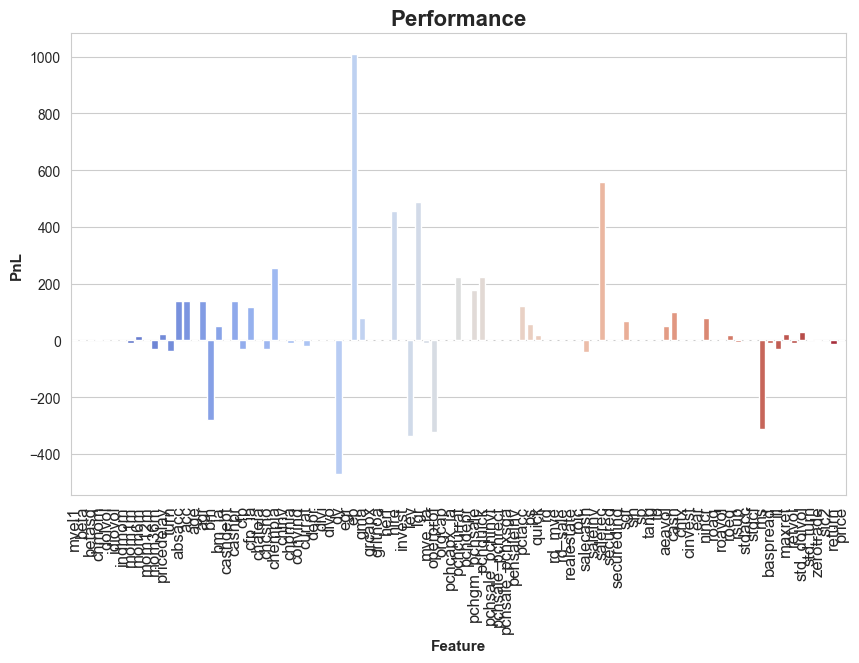

In [37]:
keys = list(feature_wise_pnl.keys())
values = list(feature_wise_pnl.values())

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

sns.barplot(x=keys, y=values, palette="coolwarm")

plt.xlabel("Feature", fontsize=11, fontweight='bold')
plt.ylabel("PnL", fontsize=11, fontweight='bold')
plt.title("Performance", fontsize=16, fontweight='bold')

plt.xticks(rotation=90, fontsize=12)

plt.show()

In [177]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Feature matrix (each row represents a stock, each column a feature)
features = dfx.drop(columns=["permno"])  

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)




In [178]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import matplotlib.pyplot as plt

# Compute linkage matrix (Ward’s method minimizes intra-cluster variance)
linkage_matrix = linkage(features_scaled, method="ward")

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix, labels=dfx["permno"].values)
plt.show()

# Extract clusters (e.g., cut at 5 clusters)
df["cluster"] = fcluster(linkage_matrix, 5, criterion="maxclust")


MemoryError: Unable to allocate 6.60 GiB for an array with shape (885510486,) and data type float64

In [179]:
from sklearn.cluster import AgglomerativeClustering

# Cluster into K groups without needing the full distance matrix
model = AgglomerativeClustering(n_clusters=10, linkage="ward")
clusters = model.fit_predict(features_scaled)


ValueError: Input X contains NaN.
AgglomerativeClustering does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [186]:
permno_mapping = dfx['permno'].values

df = dfx.drop(columns=['permno']).dropna(axis=1)  # Drop columns with NaN
features_scaled = StandardScaler().fit_transform(df)  # Standardize features

In [187]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")  # You can also try "median" or "most_frequent"
features_scaled = imputer.fit_transform(features_scaled)


In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import fastcluster
from scipy.cluster.hierarchy import dendrogram, fcluster
from sklearn.preprocessing import StandardScaler


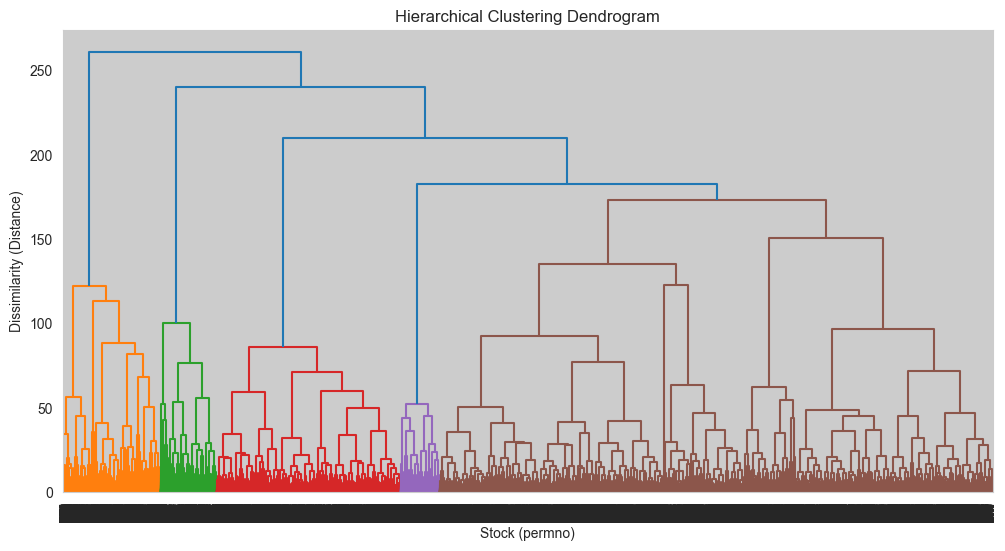

In [188]:
# Compute linkage matrix using FastCluster (Ward’s method)
linkage_matrix = fastcluster.linkage_vector(features_scaled, method="ward")

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=permno_mapping, leaf_rotation=90)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Stock (permno)")
plt.ylabel("Dissimilarity (Distance)")
plt.show()


In [190]:
from scipy.cluster.hierarchy import fcluster

# Choose optimal number of clusters (Can tune `t` based on dendrogram)
num_clusters = 10  # Adjust based on dendrogram
clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Store results in DataFrame
cluster_df = pd.DataFrame({'permno': permno_mapping, 'cluster': clusters})

# Show sample clusters
print(cluster_df.sort_values('cluster').head(20))


       permno  cluster
3301    75241        1
16890   85914        1
16863   82686        1
16860   82618        1
16859   82598        1
16851   81481        1
16850   81138        1
16841   79879        1
16762   66384        1
16738   61241        1
16709   53613        1
16702   52337        1
4646    35044        1
16666   43350        1
16665   43123        1
16638   35044        1
16619   27828        1
16542   16432        1
16452   90162        1
16392   85914        1
